<a href="https://colab.research.google.com/github/Nagmashaik123/Section203-Group06/blob/main/Vacc_Dose_TM_Bi-gram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the processed vaccination file
import pandas as pd
df=pd.read_csv(r"ProcessedCovidVaccineReact.csv")
df

,TweetDate,TweetText,CleanedTweet,TweetAuthor,TweetLocation,AllHashtags,Country
0,2021-04-02 23:59:56,RT @ichaydon: A year ago I tried the Moderna v...,rt ichaydon year ago tried moderna vaccine see...,realbafomet,United Arab Emirates,['COVIDvaccine'],United Arab Emirates
1,2021-04-02 23:59:53,RT @hotvickkrishna: Why we need Two Doses of m...,rt hotvickkrishna need two doses mrna vaccine ...,EVANtiel,Unknown,"['vaccines', 'COVID19', 'Pfizer', 'moderna', '...",Unknown
2,2021-04-02 23:59:46,RT @StephMillerShow: Stick it in! Moderna Mama...,rt stephmillershow stick moderna mama house ya...,anessia40,Unknown,"['vaccinated', 'VaccinesWork', 'VaccinesSaveLi...",Unknown
3,2021-04-02 23:59:43,RT @hotvickkrishna: Why we need Two Doses of m...,rt hotvickkrishna need two doses mrna vaccine ...,tammeeh,Kota Petir,"['vaccines', 'COVID19', 'Pfizer', 'moderna', '...",Indonesia
4,2021-04-02 23:59:43,RT @ichaydon: A year ago I tried the Moderna v...,rt ichaydon year ago tried moderna vaccine see...,shipshape555,San Diego,['COVIDvaccine'],United States
...,...,...,...,...,...,...,...
206245,2021-03-10 22:35:54,I blasted this in the car as an Army nurse gav...,blasted car army nurse gave covid vaccine toda...,MatthewDWhite2,New Orleans,"['vaccinated', 'vaccine', 'rona', 'Mississippi...",United States
206246,2021-03-10 22:35:48,2nd #Pfizer shot!! I’m vaccinated! Thank you @...,pfizer shot im vaccinated thank vanyharbor gre...,NYMetroVets,Bronx,"['Pfizer', 'Veterans', 'CovidVaccine']",United States
206247,2021-03-10 22:35:09,@Sarahluvshkey77 Tomorrow is two weeks since m...,tomorrow two weeks since second shot appointme...,G8rgrrlCheryl,Western Washington,['vaccinated'],United States
206248,2021-03-10 22:35:00,"#COVID19 vaccines are hard to come by, but the...",vaccines hard come theres new way find shot ch...,medicaldaily,New York,"['COVID19', 'COVID19vaccine', 'vaccineregistra...",United States


In [ ]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package brown_tei to /root/nltk_data...
       |   Unzipping corpora/brown_tei.zip.
       | Downloading package cess_cat to /root/nltk_data...
       |   Unzipping corpora/cess_cat.zip.
       | Downloading package cess_esp to /root/nltk_data...
 

True

In [ ]:
# Importing packages
import pandas as pd
from gensim.models import Phrases
from gensim import corpora, models
from nltk.tokenize import word_tokenize 
tokens=[]
bigram = Phrases()

# Iterating through cleaned tweets
for a in df["CleanedTweet"]:
  try:
    if pd.isnull(a) or float(a):
      tokens.append("")
  except ValueError:
# Converting into tokens   
      tokens.append(word_tokenize(a))

# Calling bi-grams API to fetch the bi-grams
bigram_data = models.Phrases(tokens, min_count=30)
bigrams_mod_val = models.phrases.Phraser(bigram_data)




In [ ]:

import operator
dictionary={}
count=0
bigrams=[]
# Creating the dictionary as key value pairs for each bi and its corresponding frequency count
for id in range(len(tokens)):
    for token in bigrams_mod_val[tokens[id]]:
        if '_' in token:
          bigrams.append(token)
          tokens[id].append(token)
# Setting key value dictionary           
for keyVal in bigrams:
  if keyVal in dictionary:
    dictionary[keyVal]+=1
  else:
    dictionary[keyVal]=1

# Returns the final list of bigram Map.    
data= sorted(dictionary.items(),key=operator.itemgetter(1),reverse=True)


In [ ]:
data[:20000]

[('anniversary_im', 4456),
 ('see_safe', 4454),
 ('ichaydon_year', 4449),
 ('ago_tried', 4449),
 ('two_doses', 3532),
 ('mrna_vaccine', 3503),
 ('vaccines_pfizer', 3410),
 ('moderna_vaccinessavelives', 3406),
 ('vaccinated_httpstco', 3398),
 ('hotvickkrishna_need', 3391),
 ('life_saving', 3376),
 ('trump_would', 3289),
 ('davidmweissman_never', 3285),
 ('would_imagine', 3285),
 ('leaving_maga', 3285),
 ('ending_support', 3285),
 ('got_first', 2924),
 ('first_dose', 2665),
 ('side_effects', 2630),
 ('fully_vaccinated', 2451),
 ('donut_krispykreme', 1946),
 ('fucking_year', 1930),
 ('maryltrump_long', 1928),
 ('emas_safety', 1871),
 ('committee_prac', 1865),
 ('slots_ca', 1796),
 ('second_dose', 1733),
 ('outweigh_risks', 1475),
 ('astrazeneca_still', 1417),
 ('concludes_benefits', 1408),
 ('received_first', 1251),
 ('cant_wait', 1235),
 ('blood_clots', 1186),
 ('cvs_locations', 1183),
 ('doses_uk', 1137),
 ('country_doses', 941),
 ('reminder_eu', 938),
 ('richardgcorbett_marr', 937),
 (

In [ ]:
labels = ['Bigram_Words', 'Frequency']
df = pd.DataFrame.from_records(data[:20000], columns=labels)
df

,Bigram_Words,Frequency
0,anniversary_im,4456
1,see_safe,4454
2,ichaydon_year,4449
3,ago_tried,4449
4,two_doses,3532
...,...,...
3515,introduced_paid,1
3516,leave_looking,1
3517,hilarious_explainer,1
3518,concerns_relating,1


In [ ]:
# Analysing the bi-grams and manually reading the bi-grams and categorizing them as First Dose , Second Dose and yet to be vaccinated
First_Dose =[ 'first_dose', 'got_first','receives_first','took_first','due_second','single_dose','wearamask_firstdosedone'] # First Dose declaring manually for analysis
Second_Dose =['received_second','second_dose','doses_administered','administering_doses','two_doses','fully_vaccinated','vaccinated_rejuvenated'] # Second Dose declaring manually for analysis
Appointments_Scheduled = ['schedule_appointment','appointment_saturday','appointments_newly','appointment_online'] # Scheduled appointments declaring manually for analysis

First_Dose_Count   = df.loc[df['Bigram_Words'].isin(First_Dose), 'Frequency'].sum()
Second_Dose_Count  = df.loc[df['Bigram_Words'].isin(Second_Dose), 'Frequency'].sum()
Appointments_Count = df.loc[df['Bigram_Words'].isin(Appointments_Scheduled), 'Frequency'].sum()

# initialize list of lists
Vaccination_Doses = [['First Dose', First_Dose_Count], ['Second Dose', Second_Dose_Count], ['Appointments Scheduled', Appointments_Count]]
  
# Create the pandas DataFrame
df = pd.DataFrame(Vaccination_Doses, columns = ['Vaccination Doses', 'Population Count'])
  
# print dataframe.
df

,Vaccination Doses,Population Count
0,First Dose,6901
1,Second Dose,9752
2,Appointments Scheduled,595


Text(0, 0.5, 'Vaccination Dosage Count')

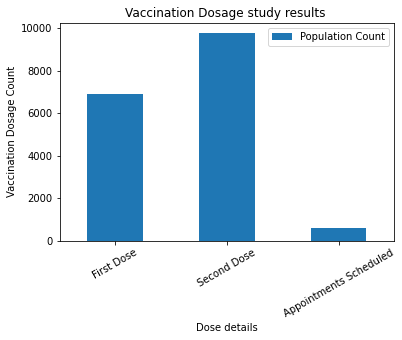

In [ ]:
from matplotlib import pyplot as plt
# Create a sample dataframe with an text index
plotdata = pd.DataFrame(
    {"Population Count": [6901, 9752, 595]}, 
    index=["First Dose","Second Dose","Appointments Scheduled"])
# Plot a bar chart
plotdata.plot(kind="bar")

plotdata['Population Count'].plot(kind="bar", title="")
# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Vaccination Dosage study results ")
plt.xlabel("Dose details")
plt.ylabel("Vaccination Dosage Count")

